<a href="https://colab.research.google.com/github/AnhtonyCharca/depp_taller2/blob/main/MAPAS_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOCTORADO EN ECONOMÍA Y POLITICAS PÚBLICAS

ALEX ANTONI QUISPE CHARCA

elaboracion de mapas - con data desde GITHUB

borrar toda la informacion de la memoria

In [13]:
%reset -f

# Task
Cargar y mostrar las primeras filas del archivo shapefile "https://github.com/AnhtonyCharca/depp_taller2/blob/main/data_mapas/Limites_departamentales/BAS_LIM_DEPARTAMENTO.shp".

## Instalar bibliotecas

### Subtask:
Instalar las bibliotecas necesarias para trabajar con shapefiles (por ejemplo, geopandas).


**Reasoning**:
The subtask is to install the necessary library `geopandas`.



In [14]:
%pip install geopandas

**Reasoning**:
Install the missing `wget` library to download the shapefile.



In [15]:
%pip install wget

**Reasoning**:
Now that wget is installed, download the shapefile from the provided URL.



In [16]:
import wget

url = 'https://github.com/AnhtonyCharca/depp_taller2/blob/main/data_mapas/Limites_departamentales/BAS_LIM_DEPARTAMENTO.shp'
output_path = 'BAS_LIM_DEPARTAMENTO.shp'
wget.download(url, output_path)

'BAS_LIM_DEPARTAMENTO (1).shp'

## Cargar datos

### Subtask:
Cargar el archivo shapefile en un GeoDataFrame.


**Reasoning**:
Import the geopandas library and load the shapefile into a GeoDataFrame.



In [17]:
import requests

base_url = 'https://raw.githubusercontent.com/AnhtonyCharca/depp_taller2/main/data_mapas/Limites_departamentales/BAS_LIM_DEPARTAMENTO'
extensions = ['.shp', '.shx', '.dbf', '.prj']

for ext in extensions:
    url = base_url + ext
    output_path = 'BAS_LIM_DEPARTAMENTO' + ext
    response = requests.get(url)
    response.raise_for_status()
    with open(output_path, 'wb') as f:
        f.write(response.content)

import geopandas

gdf_departamentos = geopandas.read_file('BAS_LIM_DEPARTAMENTO.shp')

## Explorar datos

### Subtask:
Mostrar las primeras filas del GeoDataFrame para verificar que los datos se cargaron correctamente.


**Reasoning**:
Display the first few rows of the GeoDataFrame to verify the data was loaded correctly.



In [18]:
display(gdf_departamentos.head())

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((212372.284 9332652.146, 212473.276 9..."
1,ANCASH,166,02,3596224.600,"POLYGON ((150666.941 9058816.782, 150667.214 9..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((781311.035 8490376.526, 781314.444 8..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((518459.305 8278798.442, 518429.805 8..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((571155.261 8654149.131, 571057.668 8..."


## Summary:

### Data Analysis Key Findings

*   The necessary libraries, including `geopandas` and `wget`, were successfully installed or were already present in the environment.
*   Directly reading a shapefile from a GitHub URL using `geopandas` is not supported; all component files (.shp, .shx, .dbf, .prj) need to be downloaded locally.
*   The component files of the shapefile were successfully downloaded from their raw URLs on GitHub using the `requests` library.
*   The shapefile was successfully loaded into a GeoDataFrame named `gdf_departamentos`.
*   The first five rows of the `gdf_departamentos` GeoDataFrame were displayed, showing columns like `NOMBDEP`, `COUNT`, `FIRST_IDDP`, `HECTARES`, and the `geometry` column containing polygon data.

### Insights or Next Steps

*   The GeoDataFrame `gdf_departamentos` is now ready for further spatial analysis or visualization of departmental limits.
*   Consider exploring the coordinate reference system (CRS) of the GeoDataFrame to ensure it is appropriate for any planned spatial operations.


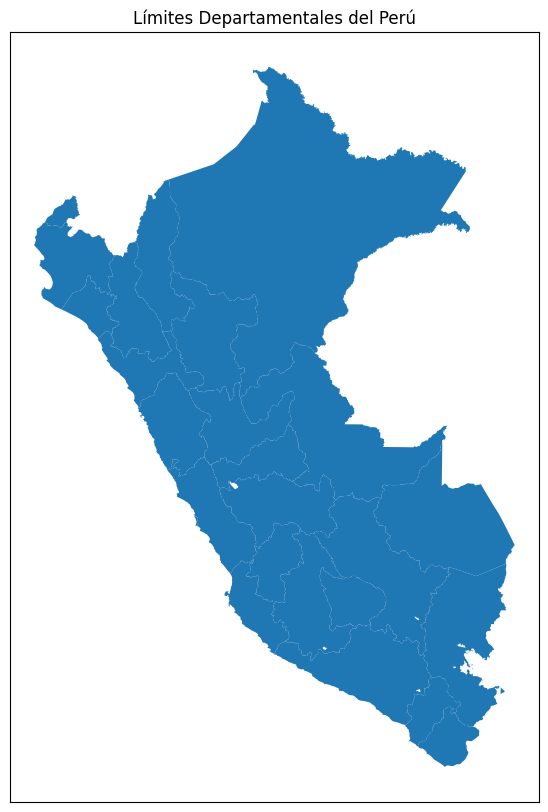

In [21]:
import matplotlib.pyplot as plt

# Graficar el GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_departamentos.plot(ax=ax)

# Opcional: Añadir título
ax.set_title('Límites Departamentales del Perú')

# Opcional: Remover ejes
ax.set_xticks([])
ax.set_yticks([])

plt.show()

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D Polygon' is converted to 'Polygon Z'
  return ogr_read(


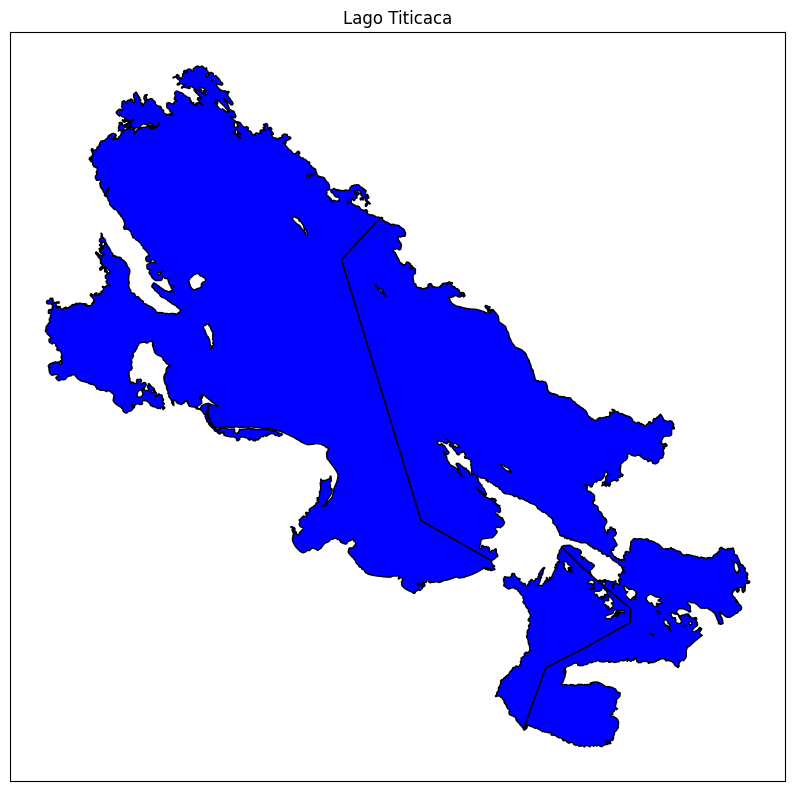

In [22]:
import requests
import geopandas
import matplotlib.pyplot as plt

# URL base para los archivos del Lago Titicaca
base_url_titicaca = 'https://raw.githubusercontent.com/AnhtonyCharca/depp_taller2/main/data_mapas/Lago%20Titicaca/B_LAGO_TITICACA'
extensions = ['.shp', '.shx', '.dbf', '.prj']

# Descargar los archivos componentes del shapefile del Lago Titicaca
for ext in extensions:
    url = base_url_titicaca + ext
    output_path = 'B_LAGO_TITICACA' + ext
    response = requests.get(url)
    response.raise_for_status() # Levanta un error para respuestas HTTP inválidas
    with open(output_path, 'wb') as f:
        f.write(response.content)

# Cargar el shapefile del Lago Titicaca en un GeoDataFrame
gdf_titicaca = geopandas.read_file('B_LAGO_TITICACA.shp')

# Graficar el GeoDataFrame del Lago Titicaca
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_titicaca.plot(ax=ax, color='blue', edgecolor='black')

# Opcional: Añadir título
ax.set_title('Lago Titicaca')

# Opcional: Remover ejes
ax.set_xticks([])
ax.set_yticks([])

plt.show()

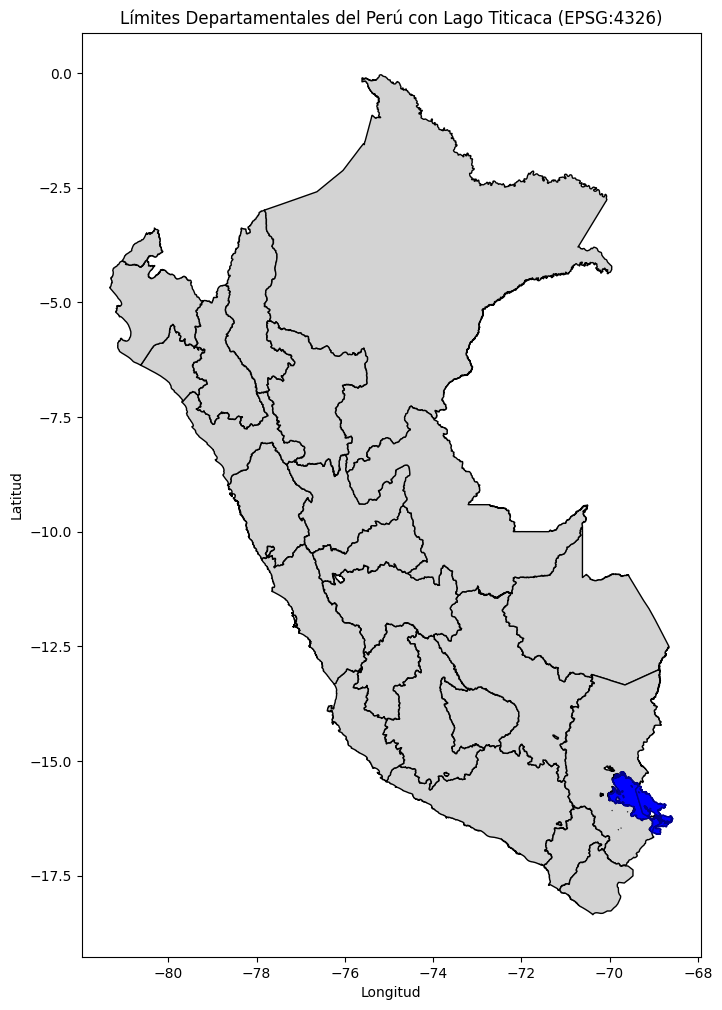

In [24]:
# Verificar y reproyectar a un CRS común si es necesario (por ejemplo, EPSG:4326 - WGS84, que es decimal)
# Puedes verificar el CRS actual con gdf_departamentos.crs y gdf_titicaca.crs
# Si son diferentes o no son decimales, reproyecta:
gdf_departamentos_decimal = gdf_departamentos.to_crs(epsg=4326)
gdf_titicaca_decimal = gdf_titicaca.to_crs(epsg=4326)

# Asumiendo que ya están en un CRS compatible o decimal, graficar juntos
# Si necesitas reproyectar, usa los GeoDataFrames reproyectados en lugar de los originales
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Graficar los límites departamentales
gdf_departamentos_decimal.plot(ax=ax, edgecolor='black', facecolor='lightgray')

# Graficar el Lago Titicaca sobre los límites departamentales
gdf_titicaca_decimal.plot(ax=ax, color='blue', edgecolor='darkblue')

# Opcional: Añadir título
ax.set_title('Límites Departamentales del Perú con Lago Titicaca (EPSG:4326)')

# Mostrar ejes (con coordenadas decimales si el CRS lo permite)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')


plt.show()